In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('london_weather.csv')

print(df.head())

       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  


In [3]:
print(df.isnull().sum())

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64


In [4]:

df.fillna(df.mean(), inplace=True)

X = df.drop(['mean_temp', 'date'], axis=1)
y = df['mean_temp']


In [5]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)


In [6]:

linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)


In [7]:

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Linear Regression - MSE: {mse_linear}, R2: {r2_linear}")
print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")
print(f"XGBoost - MSE: {mse_xgb}, R2: {r2_xgb}")



Linear Regression - MSE: 0.8401800753056661, R2: 0.9741848326877719
Random Forest - MSE: 0.8407667745672079, R2: 0.9741668059098896
XGBoost - MSE: 0.8558933070091371, R2: 0.9737020317771536


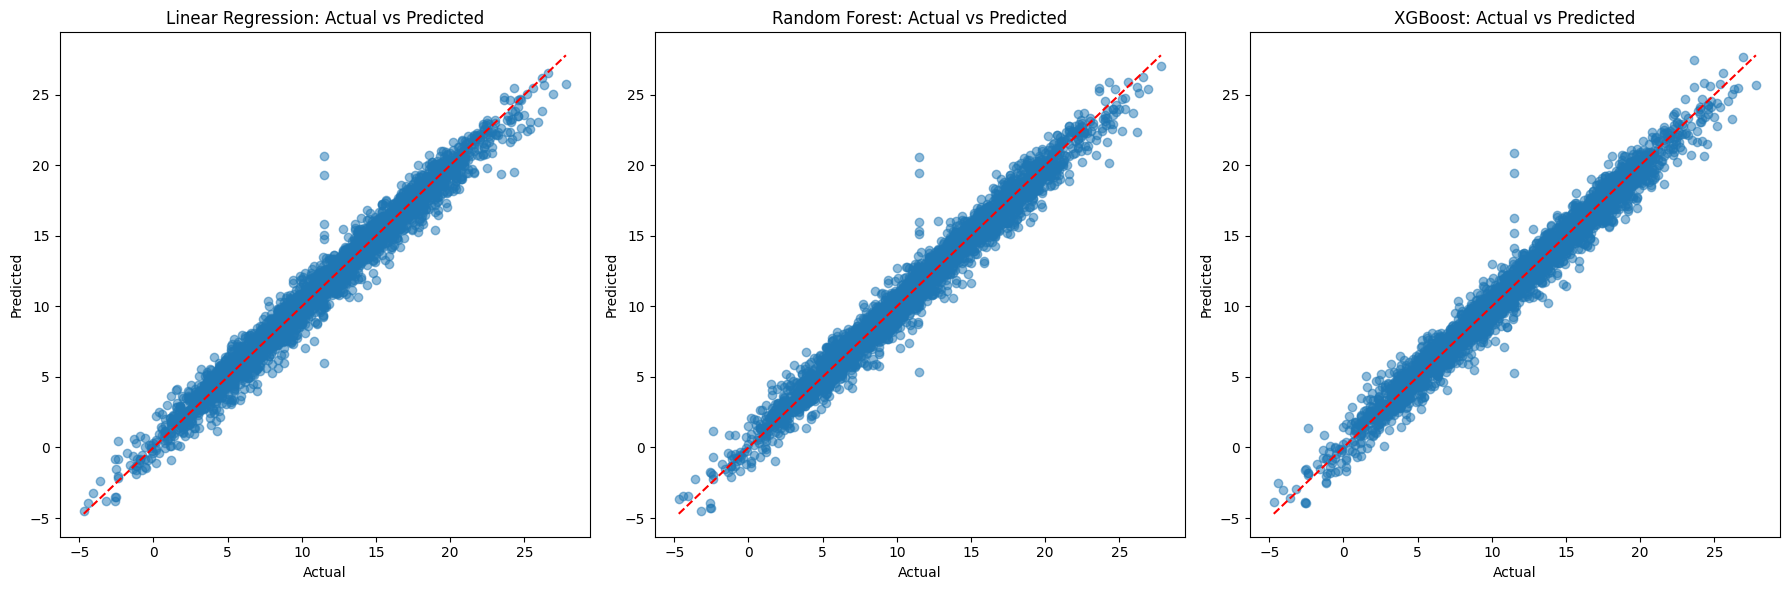

In [8]:

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()



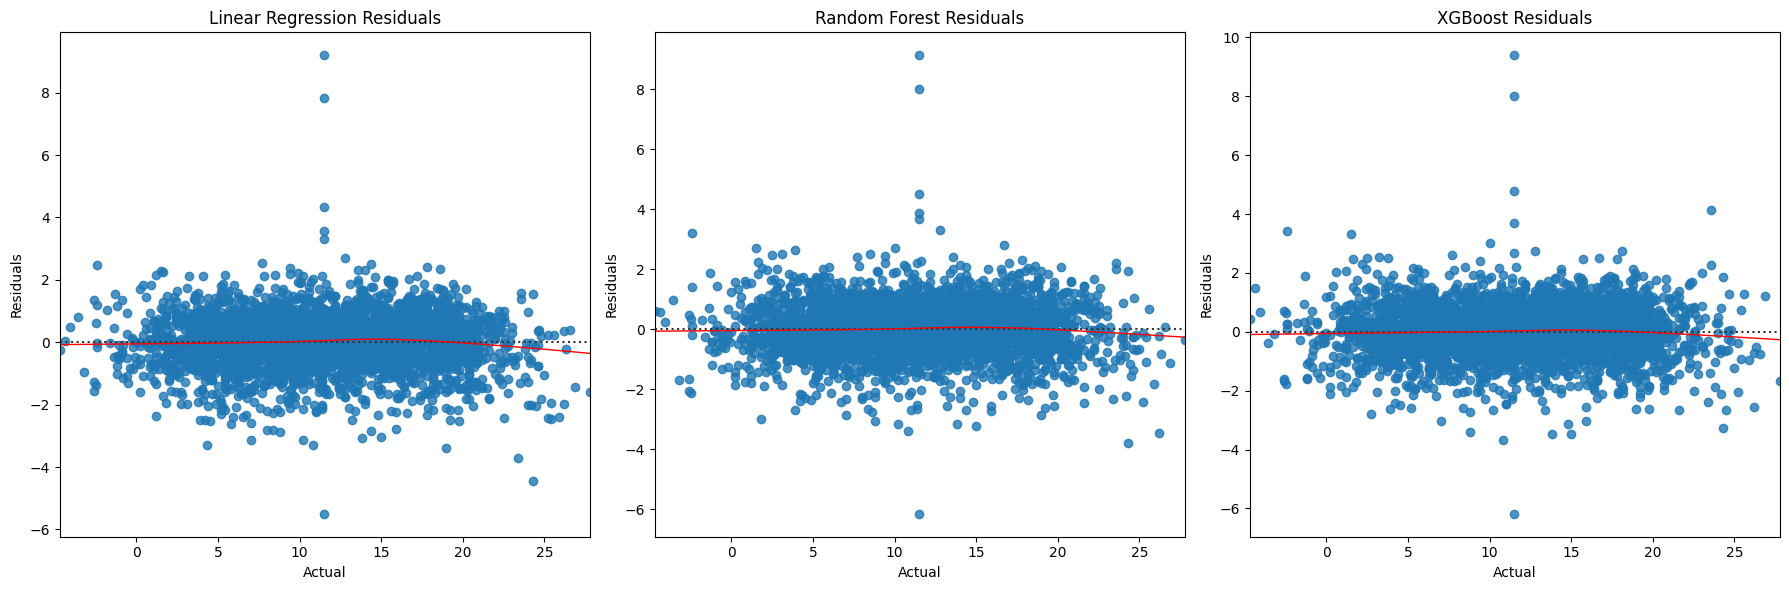

In [9]:

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.residplot(x=y_test, y=y_pred_linear, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Linear Regression Residuals')
plt.xlabel('Actual')
plt.ylabel('Residuals')


plt.subplot(1, 3, 2)
sns.residplot(x=y_test, y=y_pred_rf, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Random Forest Residuals')
plt.xlabel('Actual')
plt.ylabel('Residuals')


plt.subplot(1, 3, 3)
sns.residplot(x=y_test, y=y_pred_xgb, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('XGBoost Residuals')
plt.xlabel('Actual')
plt.ylabel('Residuals')


plt.tight_layout()
plt.show()
